<a href="https://colab.research.google.com/github/chriswilson2020/PyTorchCoLab/blob/main/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

Resources:

* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of the notebook - https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
what_were_covering = {1: "date (prepare and load",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'date (prepare and load',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
torch.__version__

'1.12.1+cu113'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning. 

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation. 
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.



In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1) # Add an extra dimension to give the right dimensionality
y = weight * X + bias

print(f"X is: {X[:10]}\n")
print(f"y is: {y[:10]}")


X is: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

y is: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
print(f"The data for the training set consists of: {train_split} samples \n")

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"The training data consists of:    {len(X_train)} X and {len(y_train)} y pairs")
print(f"The test data consists of:        {len(X_test)} X and {len(y_test)} y pairs")

The data for the training set consists of: 40 samples 

The training data consists of:    40 X and 40 y pairs
The test data consists of:        10 X and 10 y pairs


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue.
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data" )

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  
  # Show the legend
  plt.legend(prop={"size": 14});

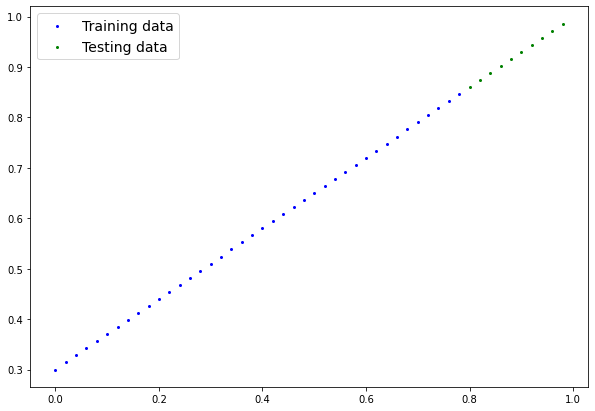

In [ ]:
plot_predictions();

## 2. Build model

Out first PyTorch model. 

Let's get to coding!!!


Because we are going to be building classes throughout the course here is a good resource for learning OOP or object oriented programming.

Resources for Python Classes - https://realpython.com/python3-object-oriented-programming/

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent - https://youtu.be/IHZwWFHWa-w
2. Backpropagation - https://youtu.be/Ilg3gGewQ5U

In [ ]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()

    # Initialize model parameters - Note: you don't have to initialize with random parameters you can also include them explicitly
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float32)) # <- PyTorch loves the data type torch.float32
    
    self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # <- can this parameter be updated via gradient descent?
                                         dtype=torch.float)) # <- PyTorch loves the data type torch.float32
    
  # Forward method to define the computation model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula



### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - What parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class of all neural network modules, if you subclass it, you should overwrite forward
* torch.optim - This is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

See more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we have created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.



In [ ]:
# Create a random seed

torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our models predictive power lets see how well it predicts `y_test` based on `X_test`

When we pass data through our model its going to run it through the forward method

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

#with torch.no_grad(): #Older way of doing this before inference mode
#  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

See more on inference mode here - https://twitter.com/pytorch/status/1437838231505096708

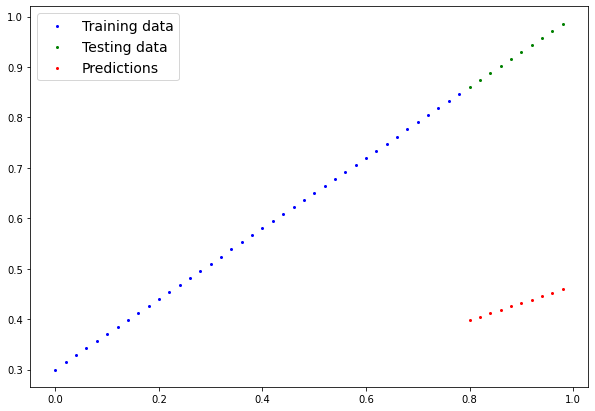

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some unknown parameters which may be random to some known parameters.

Or in otherwords from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function. 

* Note: Loss function may also be called cost function or criterion in different areas. In our case we are going to refer to it as a loss function.

* **Loss function:** A function to measure how wrong your models predictions are to the ideal outputs so lower is better. 
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameter (e.g. weight & bias) in our case to improve the loss function - https://pytorch.org/docs/stable/optim.html#module-torch.optim

  * Inside the optimizer you'll often have to set two parameters
    * `params`- the model parameters you'd like to optimise for example `params=model_0.parameters()`
    * lr (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` resutls in small changes, a large `lr` results in large changes)

And specifically for PyTorch we need: 
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's parameters (A parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.00005) # lr = learning rate = possibly the most important hyperparameter you can set

**Q:** Which loss function  or optimiser should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set. 

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)



### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data and do...
1. Forward pass (this involves data moving through our models forward functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gratidents of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our models parameters to try to improve the loss (**gradient descent**)

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 36000

#Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in stap 3 for the next itteration of the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple of more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the test loss
    test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 2000 == 0:
     epoch_count.append(epoch)
     loss_values.append(loss)
     test_loss_values.append(test_loss)
     print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
     print(model_0.state_dict(), "\n")

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.4944687783718109
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1289]))]) 

Epoch: 2000 | Loss: 0.19769176840782166 | Test loss: 0.35978853702545166
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))]) 

Epoch: 4000 | Loss: 0.08984799683094025 | Test loss: 0.22916004061698914
OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3249]))]) 

Epoch: 6000 | Loss: 0.05366010591387749 | Test loss: 0.1516587734222412
OrderedDict([('weights', tensor([0.4482])), ('bias', tensor([0.3725]))]) 

Epoch: 8000 | Loss: 0.04550250247120857 | Test loss: 0.11696068942546844
OrderedDict([('weights', tensor([0.4728])), ('bias', tensor([0.3853]))]) 

Epoch: 10000 | Loss: 0.04159649834036827 | Test loss: 0.10102567821741104
OrderedDict([('weights', tensor([0.4922])), ('bias', tensor([0.3839]))]) 

Epoch: 12000 | Loss: 0.038106050342321396 | Test loss: 0.09001192450523376
OrderedDict([('weights', tensor([0.5102])

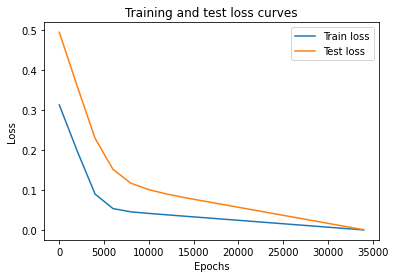

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss" )
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3000]))])

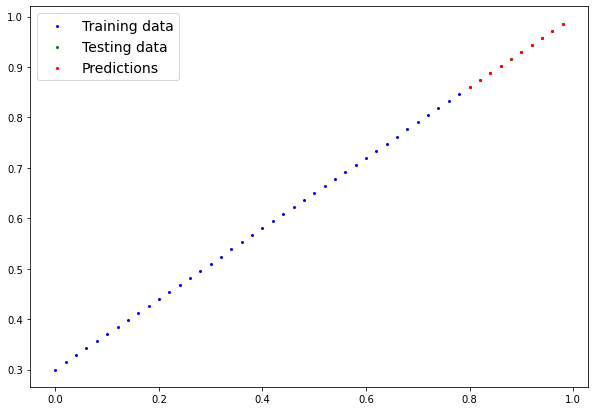

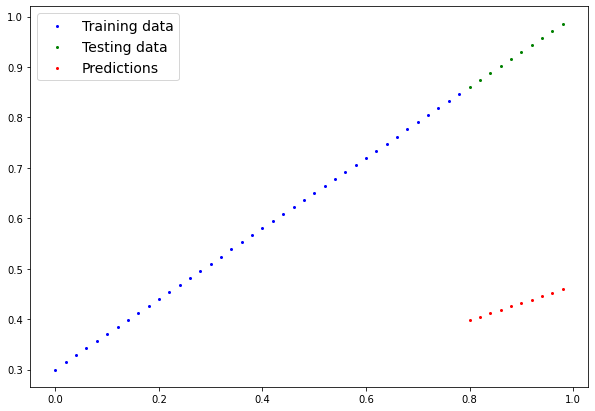

In [ ]:
plot_predictions(predictions=y_preds_new), plot_predictions(predictions=y_preds);

## Saving a model in PyTorch

There are three main methods that you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary 

Useful Resources: 
* Python Pickle https://docs.python.org/3/library/pickle.html
* Saving and Loading Models https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("drive/MyDrive/Colab/models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" 
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: drive/MyDrive/Colab/models/01_pytorch_workflow_model_0.pth


## Loading a PyTorch Model

Since we saved our models `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that. 



In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3000]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict() (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3000]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [ ]:
loaded_model_preds

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
# compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np


# Check PyTorch version
torch.__version__

'1.12.1+cu113'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing)

If no GPU is avalable, the code will default to using CPU

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


 ### 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
print(f"X data set: {X[:10]} \n\n y data set: {y[:10]}")

X data set: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) 

 y data set: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [ ]:
# Split data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"X train data points: {len(X_train)}    X test data points: {len(X_test)}")
print(f"y train data points: {len(y_train)}    y test data points: {len(y_test)}")

X train data points: 40    X test data points: 10
y train data points: 40    y test data points: 10


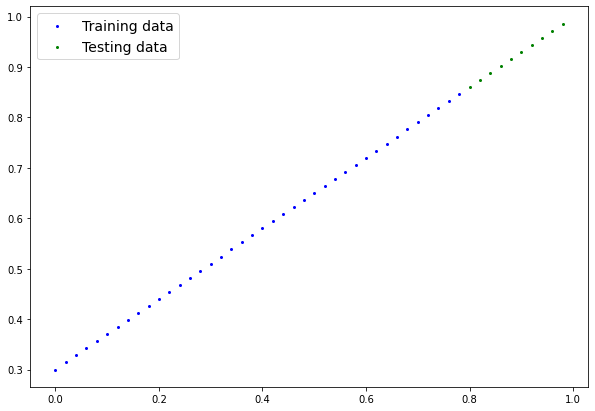

In [ ]:
# Plot the data
# Note: if you don't have the plot_predictions() functions loaded this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Liniear model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features = 1,
                                   out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))